# 1. Naive Bayes

The goal of this problem is to build naive Bayes (NB) models to classify the sentiment of tweets for US airline companies. 
The data used in this problem provide frequencies of words for individual tweets in addition to 'tweet_id', 'airline', 'airline_sentiment.'
'airline_sentiment' is the target variable, and the sentiment of tweets is one of 'negative', 'neutral', 'positive.'
The column names except for 'tweet_id', 'airline', and 'airline_sentiment' variables denote terms used in tweets. 

In [12]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
%matplotlib inline

data = pd.read_csv('airline_tweets.csv')
# data = pd.read_csv('https://drive.google.com/uc?export=download&id=1_m5WSaXzgEzzr8glWgQB5y5utODAgqvs')

print(data.head())

X = data.drop(['tweet_id', 'airline', 'airline_sentiment'], axis=1)
y = data['airline_sentiment']

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=100, stratify=y)

             tweet_id         airline airline_sentiment  said  plus  \
0  570301083672813571  Virgin America           neutral     0     0   
1  570300767074181121  Virgin America          negative     0     0   
2  570300616901320704  Virgin America          positive     0     0   
3  570289584061480960  Virgin America          positive     1     0   
4  570287408438120448  Virgin America          positive     0     0   

   experience  today  mean  need  take  ...  maintenance  friend  twice  \
0           0      0     0     0     0  ...            0       0      0   
1           0      0     0     0     0  ...            0       0      0   
2           0      0     0     0     0  ...            0       0      0   
3           0      0     0     0     0  ...            0       0      0   
4           0      0     0     0     0  ...            0       0      0   

   rebooked  pick  airways  runway  phx  destinationdragons  fleek  
0         0     0        0       0    0              

## Part 1: Bernoulli NB
To build a Bernoulli NB, if a certain term is used in a tweet, the values of the variables are converted to 1; otherwise, they are converted to 0. 

1-(1) After the conversion, train a Bernoulli NB using training set (the converted trnX, trnY) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then, calculate the overall accuracy and accuracy values corresponding to each target class (sentiment) for the training and validation sets, respectively. 

In [13]:
B_NB = BernoulliNB(alpha = 1)
B_NB.fit(trnX,trnY)
y_pred = B_NB.predict(valX)
y_pred_tr = B_NB.predict(trnX)


class_accs_tr = [[] for i in range(len(np.unique(trnY)))]
class_accs_val = [[] for i in range(len(np.unique(trnY)))]


for i, cls in enumerate(np.unique(trnY)):
    cls_valY = (valY == cls)
    cls_trnY = (trnY == cls)

    cls_predY = (y_pred == cls)
    cls_predY_tr = (y_pred_tr == cls)


    cls_acc_tr = np.equal(cls_trnY, cls_predY_tr).mean()
    cls_acc_val = np.equal(cls_valY, cls_predY).mean()

    class_accs_tr[i].append(cls_acc_tr)
    class_accs_val[i].append(cls_acc_val)


print('train accuracy:', np.equal(trnY, y_pred_tr).mean())


for class_name, cls_acc in zip(np.unique(trnY),class_accs_tr):
    print(f'train {class_name} class: ', np.round(cls_acc[0], 2))

print('valid accuracy:', np.equal(valY, y_pred).mean())

for class_name, cls_acc in zip(np.unique(trnY),class_accs_val):
    print(f'valid {class_name} class: ', np.round(cls_acc[0], 2))

train accuracy: 0.8391678335667133
train negative class:  0.85
train neutral class:  0.89
train positive class:  0.93
valid accuracy: 0.7968
valid negative class:  0.81
valid neutral class:  0.87
valid positive class:  0.91


1-(2) Find the top 10 most probable terms in each target according to the model trained in Question 1-(1) and summarize them with the probability of existence of terms in the following tables. 

In [14]:
probs = B_NB.feature_log_prob_
df = pd.DataFrame(probs, columns=X.columns, index=['negative', 'neutral', 'positive']).T
neg_df = df.sort_values(by='negative', ascending=False)
net_df = df.sort_values(by='neutral', ascending=False)
pos_df = df.sort_values(by='positive', ascending=False)

neg_df = neg_df.groupby(level=0).head(10)
neg_df = neg_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)

net_df = net_df.groupby(level=0).head(10)
net_df = net_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)

pos_df = pos_df.groupby(level=0).head(10)
pos_df = pos_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)


neg_df.head(10)

negative neutral positive
reason      0.472   0.436    0.375
sit         0.271   0.175    0.124
bag         0.257   0.257    0.243
family      0.208   0.085    0.235
going       0.184   0.217    0.137
agents      0.179   0.142    0.171
fail        0.177   0.064    0.188
member      0.175   0.068    0.027
supposed    0.169   0.103    0.067
yes         0.168   0.179    0.169

In [15]:
net_df.head(10)

negative neutral positive
reason     0.472   0.436    0.375
soon       0.139   0.272    0.254
back       0.135   0.267    0.247
bag        0.257   0.257    0.243
missing    0.121   0.222    0.104
going      0.184   0.217    0.137
lga        0.125   0.198    0.053
pick       0.136   0.182    0.118
yes        0.168   0.179    0.169
sit        0.271   0.175    0.124

In [16]:
pos_df.head(10)

negative neutral positive
ridiculous    0.114   0.175    0.432
reason        0.472   0.436    0.375
oh            0.041   0.064    0.288
baggage       0.045   0.056    0.268
soon          0.139   0.272    0.254
back          0.135   0.267    0.247
bag           0.257   0.257    0.243
family        0.208   0.085    0.235
fail          0.177   0.064    0.188
forhours      0.153   0.175    0.180

1-(4) Find the top 10 terms whose probability of existence is high in positive (pos) tweets, but low in negative (neg) tweets according to the model trained in Question 1-(1). In addition, find the top 10 terms whose probability of existence is high in negative tweets, but low in positive tweets. 

In [17]:
log_prob_neg = B_NB.feature_log_prob_[0]
log_prob_pos = B_NB.feature_log_prob_[1]

diff_log_prob = log_prob_pos - log_prob_neg

top10_pos = np.argsort(-diff_log_prob)[:10]

# get the corresponding terms and their probability of existence in positive and negative tweets
terms = np.array(X.columns)[top10_pos]
prob_pos = np.exp(log_prob_pos[top10_pos])
prob_neg = np.exp(log_prob_neg[top10_pos])

# print the top 10 terms and their probability of existence in positive and negative tweets
print('Top 10 terms that are high in positive tweets and low in negative tweets:')
for i, term in enumerate(terms):
    print(f'{i+1}. {term}: pos={prob_pos[i]:.3f}, neg={prob_neg[i]:.3f}')


Top 10 terms that are high in positive tweets and low in negative tweets:
1. online: pos=0.030, neg=0.001
2. bos: pos=0.019, neg=0.001
3. happened: pos=0.051, neg=0.005
4. expect: pos=0.033, neg=0.004
5. let: pos=0.024, neg=0.003
6. received: pos=0.028, neg=0.004
7. points: pos=0.013, neg=0.002
8. im: pos=0.013, neg=0.002
9. traveling: pos=0.024, neg=0.004
10. leaving: pos=0.022, neg=0.004


In [18]:
diff_log_prob = log_prob_neg - log_prob_pos

top10_neg = np.argsort(-diff_log_prob)[:10]

# get the corresponding terms and their probability of existence in positive and negative tweets
terms = np.array(X.columns)[top10_neg]
prob_pos = np.exp(log_prob_pos[top10_neg])
prob_neg = np.exp(log_prob_neg[top10_neg])


print('Top 10 terms that are high in negative tweets and low in positive tweets:')
for i, term in enumerate(terms):
    print(f'{i+1}. {term}: pos={prob_pos[i]:.3f}, neg={prob_neg[i]:.3f}')

Top 10 terms that are high in negative tweets and low in positive tweets:
1. rebooked: pos=0.002, neg=0.032
2. rt: pos=0.002, neg=0.028
3. iad: pos=0.002, neg=0.019
4. point: pos=0.002, neg=0.017
5. sorry: pos=0.002, neg=0.016
6. issues: pos=0.002, neg=0.014
7. working: pos=0.002, neg=0.013
8. telling: pos=0.002, neg=0.012
9. luggage: pos=0.002, neg=0.012
10. dm: pos=0.003, neg=0.023


## Part 2: Multinomial NB

2-(1) Train a multinomial NB using training set (trnX, trnY) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then calculate the overall accuracy and accuracy values corresponding to each target class (sentiment) for the training and validation sets, respectively. 

In [20]:
M_NB = MultinomialNB(alpha = 1)
M_NB.fit(trnX,trnY)
y_pred = M_NB.predict(valX)
y_pred_tr = M_NB.predict(trnX)



class_accs_tr = [[] for i in range(len(np.unique(trnY)))]
class_accs_val = [[] for i in range(len(np.unique(trnY)))]


for i, cls in enumerate(np.unique(trnY)):
    cls_valY = (valY == cls)
    cls_trnY = (trnY == cls)
    cls_predY = (y_pred == cls)
    cls_predY_tr = (y_pred_tr == cls)

    cls_acc_tr = np.equal(cls_trnY, cls_predY_tr).mean()
    cls_acc_val = np.equal(cls_valY, cls_predY).mean()

    class_accs_tr[i].append(cls_acc_tr)
    class_accs_val[i].append(cls_acc_val)


print('train accuracy:', np.equal(trnY, y_pred_tr).mean())


for class_name, cls_acc in zip(np.unique(trnY),class_accs_tr):
    print(f'train {class_name} class: ', np.round(cls_acc[0], 2))

print('valid accuracy:', np.equal(valY, y_pred).mean())



for class_name, cls_acc in zip(np.unique(trnY),class_accs_val):
    print(f'valid {class_name} class: ', np.round(cls_acc[0], 2))




train accuracy: 0.8405681136227245
train negative class:  0.86
train neutral class:  0.89
train positive class:  0.93
valid accuracy: 0.7944
valid negative class:  0.81
valid neutral class:  0.87
valid positive class:  0.91


2-(2) Find the top 20 most probable terms in each target according to the model trained in Question 2-(1) and summarize them with the probability of existence of terms in the following tables. 

In [21]:
probs = M_NB.feature_log_prob_
df = pd.DataFrame(probs, columns=X.columns, index=['negative', 'neutral', 'positive']).T
neg_df = df.sort_values(by='negative', ascending=False)
net_df = df.sort_values(by='neutral', ascending=False)
pos_df = df.sort_values(by='positive', ascending=False)

neg_df = neg_df.groupby(level=0).head(10)
neg_df = neg_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)

net_df = net_df.groupby(level=0).head(10)
net_df = net_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)

pos_df = pos_df.groupby(level=0).head(10)
pos_df = pos_df.apply(lambda x: x.apply(lambda y: '{:.3f}'.format(pow(2, y))), axis=1)


neg_df.head(10)

negative neutral positive
reason      0.128   0.114    0.094
sit         0.067   0.041    0.029
bag         0.064   0.064    0.058
family      0.051   0.020    0.056
going       0.045   0.052    0.032
agents      0.045   0.036    0.043
fail        0.043   0.015    0.044
member      0.043   0.016    0.006
yes         0.043   0.046    0.043
supposed    0.041   0.024    0.015

In [22]:
net_df.head(10)

negative neutral positive
reason      0.128   0.114    0.094
soon        0.033   0.071    0.060
back        0.032   0.068    0.058
bag         0.064   0.064    0.058
missing     0.030   0.054    0.026
going       0.045   0.052    0.032
lga         0.030   0.049    0.012
yes         0.043   0.046    0.043
pick        0.034   0.043    0.028
forhours    0.039   0.042    0.043

In [23]:
pos_df.head(10)

negative neutral positive
ridiculous    0.027   0.041    0.102
reason        0.128   0.114    0.094
oh            0.010   0.016    0.070
baggage       0.011   0.014    0.066
soon          0.033   0.071    0.060
back          0.032   0.068    0.058
bag           0.064   0.064    0.058
family        0.051   0.020    0.056
fail          0.043   0.015    0.044
agents        0.045   0.036    0.043

2-(3) Find the top 10 terms whose probability of existence is high in positive (pos) tweets, but low in negative (neg) tweets according to the model trained in Question 2-(1). In addition, find the top 10 terms whose probability of existence is high in negative tweets, but low in positive tweets. 

In [24]:
log_prob_neg = M_NB.feature_log_prob_[0]
log_prob_pos = M_NB.feature_log_prob_[1]

diff_log_prob = log_prob_pos - log_prob_neg

top10_pos = np.argsort(-diff_log_prob)[:10]

# get the corresponding terms and their probability of existence in positive and negative tweets
terms = np.array(X.columns)[top10_pos]
prob_pos = np.exp(log_prob_pos[top10_pos])
prob_neg = np.exp(log_prob_neg[top10_pos])

# print the top 10 terms and their probability of existence in positive and negative tweets
print('Top 10 terms that are high in positive tweets and low in negative tweets:')
for i, term in enumerate(terms):
    print(f'{i+1}. {term}: pos={prob_pos[i]:.3f}, neg={prob_neg[i]:.3f}')

Top 10 terms that are high in positive tweets and low in negative tweets:
1. online: pos=0.004, neg=0.000
2. bos: pos=0.002, neg=0.000
3. happened: pos=0.006, neg=0.001
4. expect: pos=0.004, neg=0.000
5. let: pos=0.003, neg=0.000
6. received: pos=0.003, neg=0.001
7. im: pos=0.002, neg=0.000
8. leaving: pos=0.003, neg=0.001
9. job: pos=0.003, neg=0.001
10. points: pos=0.002, neg=0.000


In [25]:
diff_log_prob = log_prob_neg - log_prob_pos

top10_neg = np.argsort(-diff_log_prob)[:10]

# get the corresponding terms and their probability of existence in positive and negative tweets
terms = np.array(X.columns)[top10_neg]
prob_pos = np.exp(log_prob_pos[top10_neg])
prob_neg = np.exp(log_prob_neg[top10_neg])


print('Top 10 terms that are high in negative tweets and low in positive tweets:')
for i, term in enumerate(terms):
    print(f'{i+1}. {term}: pos={prob_pos[i]:.3f}, neg={prob_neg[i]:.3f}')

Top 10 terms that are high in negative tweets and low in positive tweets:
1. rebooked: pos=0.000, neg=0.004
2. rt: pos=0.000, neg=0.004
3. iad: pos=0.000, neg=0.002
4. point: pos=0.000, neg=0.002
5. sorry: pos=0.000, neg=0.002
6. issues: pos=0.000, neg=0.002
7. working: pos=0.000, neg=0.002
8. telling: pos=0.000, neg=0.001
9. luggage: pos=0.000, neg=0.001
10. dm: pos=0.000, neg=0.003


# 2. Decision tree

In this question, you have to train decision tree models to classify the quality level of different red wines. The quality level of red wines is one of low(0), medium(1), and high(2). The explanatory variables are as follows:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol


In [26]:
# packages and data import
# DO NOT CHANGE THIS PART
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('red-wine.csv')
# data = pd.read_csv('https://drive.google.com/uc?export=download&id=1ECpejgarOgstSazQCzsQOiPW_uLVxLJL')

X = data.drop(['quality'],axis=1)
y = data['quality']

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=555, stratify=y)

In [27]:
y.unique()

array([0, 1, 2], dtype=int64)

(1) Train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the Gini impurity for the criterion to determine the best split, using a training set (trnX, trnY). Then, calculate the accuracy of the models using a validation set (valX, valY) for overall samples and individual classes, and fill the following table. 

In [28]:

max_depths = [1, 2, 3, 4, 5]
overall_accs = []
class_accs = [[] for i in range(len(np.unique(trnY)))]

# Loop over maximum depth values and train decision tree models
for max_depth in max_depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=10)
    clf.fit(trnX, trnY)
    predY = clf.predict(valX)
    
    # Calculate overall accuracy
    overall_acc = np.equal(valY, predY).mean()
    overall_accs.append(overall_acc)
    
    # Calculate class-wise accuracy
    for i, cls in enumerate(np.unique(trnY)):
        cls_valY = (valY == cls)
        cls_predY = (predY == cls)
        cls_acc = np.equal(cls_valY, cls_predY).mean()
        class_accs[i].append(cls_acc)
        
# Print results in table format
print("Depth\tOverall\tClass 1\tClass 2\tClass 3")
for i, max_depth in enumerate(max_depths):
    row = [str(max_depth)]
    row.append("{:.3f}".format(overall_accs[i]))
    for cls_acc in class_accs:
        row.append("{:.3f}".format(cls_acc[i]))
    print("\t".join(row))

Depth	Overall	Class 1	Class 2	Class 3
1	0.569	0.697	0.575	0.866
2	0.528	0.637	0.553	0.866
3	0.597	0.688	0.616	0.891
4	0.644	0.753	0.650	0.884
5	0.619	0.719	0.631	0.887


(3) Draw the trained tree with feature names when the maximum depth is set to 3. 

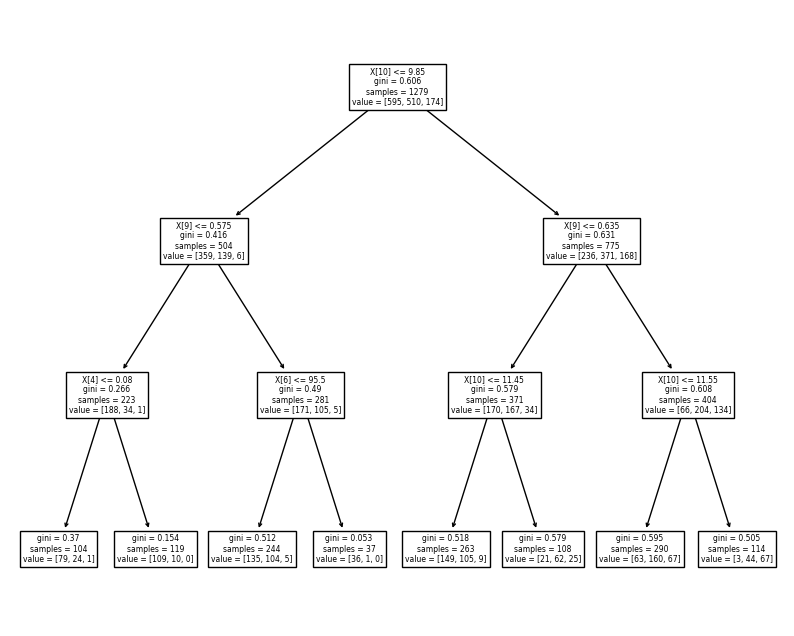

In [29]:

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=10)
clf.fit(trnX, trnY)

plt.figure(figsize=(10,8))
dot_data = plot_tree(clf)


(6) Convert the target variable to have two classes by combining the medium and high classes into one classes. Then, train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the gini impurity for the criterion to determine the best split, using a training set (trnX, trnY). Then, calculate the accuracy of the models using a validation set (valX, valY) for overall samples and individual classes, and fill the following table. 

In [30]:
data_b = data
data_b['quality'] = [v if v==0 else 1 for v in data_b['quality'].values]

X = data_b.drop(['quality'],axis=1)
y = data_b['quality']

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=555, stratify=y)

In [31]:
max_depths = [1, 2, 3, 4, 5]
overall_accs = []
class_accs = [[] for i in range(len(np.unique(trnY)))]

# Loop over maximum depth values and train decision tree models
for max_depth in max_depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=10)
    clf.fit(trnX, trnY)
    predY = clf.predict(valX)
    
    # Calculate overall accuracy
    overall_acc = np.equal(valY, predY).mean()
    overall_accs.append(overall_acc)
    
    # Calculate class-wise accuracy
    for i, cls in enumerate(np.unique(trnY)):
        cls_valY = (valY == cls)
        cls_predY = (predY == cls)
        cls_acc = np.equal(cls_valY, cls_predY).mean()
        class_accs[i].append(cls_acc)
        
# Print results in table format
print("Depth\tOverall\tClass 1\tClass 2")
for i, max_depth in enumerate(max_depths):
    row = [str(max_depth)]
    row.append("{:.3f}".format(overall_accs[i]))
    for cls_acc in class_accs:
        row.append("{:.3f}".format(cls_acc[i]))
    print("\t".join(row))

Depth	Overall	Class 1	Class 2
1	0.697	0.697	0.697
2	0.647	0.647	0.647
3	0.666	0.666	0.666
4	0.722	0.722	0.722
5	0.738	0.738	0.738


(7) Compare the two tree models of maximum depth 1 and 2 obtained for Question (6). 

In [32]:

clf = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_leaf=10)
clf.fit(trnX, trnY)

predY = clf.predict(valX)
print('max_depth 1 acc :', np.equal(valY, predY).mean())


clf = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10)
clf.fit(trnX, trnY)

predY = clf.predict(valX)
print('max_depth 2 acc :', np.equal(valY, predY).mean())


max_depth 1 acc : 0.696875
max_depth 2 acc : 0.646875


## 3 $k$-means clustering
This problem uses the data generated from 4 normal distributions for applying $k$-means clustering. 
'y’ variable denotes which normal distribution generates individual samples.
k-means implemented in sci-kit learn can assign initial centeroids through ‘init’. When init is set as $c$ by $p$ array ($c$ = the number of clusters, $p$ = the number of features), each row is used as a centroid.

In [33]:
# packages and data import
# DO NOT CHANGE THIS PART
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X,y=datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

(1) Select randomly 4 samples from the given data set and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iterations. 

In [34]:
n_iterations = 100
n_clusters = 4

silhouette_scores = []
adjusted_rand_scores = []

for i in range(n_iterations):
    initial_centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    adjusted_rand_scores.append(adjusted_rand_score(y, kmeans.labels_))

# Calculate average silhouette score and adjusted rand score
avg_silhouette_score = np.mean(silhouette_scores)
avg_adjusted_rand_score = np.mean(adjusted_rand_scores)

print("Average Silhouette Score:", avg_silhouette_score)
print("Average Adjusted Rand Score:", avg_adjusted_rand_score)

Average Silhouette Score: 0.5558737412738942
Average Adjusted Rand Score: 0.8495488541280874


(2) Select randomly one sample from each normal distribution and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iterations. 

In [35]:
silhouette_scores = []
adjusted_rand_scores = []

for i in range(n_iterations):

    initial_centroids = np.random.normal(loc=X.mean(axis=0), scale=X.std(axis=0), size=(n_clusters, X.shape[1]))
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1)
    kmeans.fit(X)

    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    adjusted_rand_scores.append(adjusted_rand_score(y, kmeans.labels_))

# Calculate average silhouette score and adjusted rand score
avg_silhouette_score = np.mean(silhouette_scores)
avg_adjusted_rand_score = np.mean(adjusted_rand_scores)

print("Average Silhouette Score:", avg_silhouette_score)
print("Average Adjusted Rand Score:", avg_adjusted_rand_score)

Average Silhouette Score: 0.573860798555839
Average Adjusted Rand Score: 0.8934315910208744


(3) Draw scatter plots for the given data with initial centroids and final centroids for the worst cases among 100 trials in Question (1) in terms of silhouette coefficient and adjusted rand index, respectively. The initial centroids should be marked as red ‘X’ and the final centroids should be marked as blue ‘X’. 

Text(0.5, 1.0, 'Worst Case in terms of adjusted rand index')

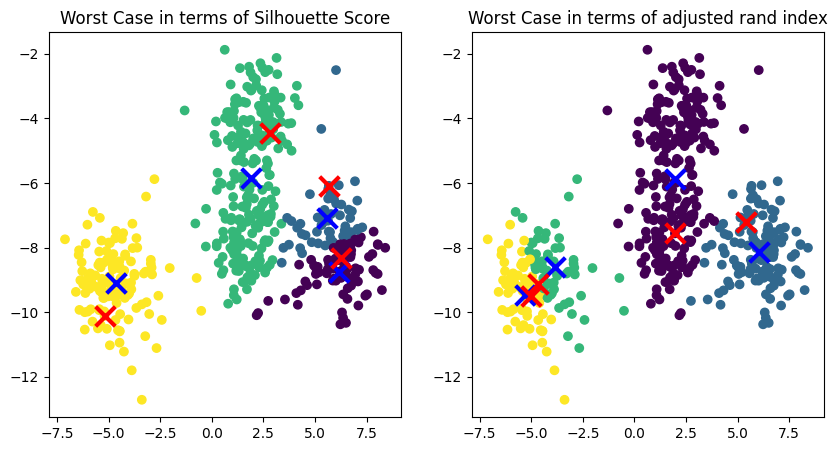

In [36]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

n_iterations = 100
n_clusters = 4

silhouette_scores = []
adjusted_rand_scores = []
kmeans_list = []

for i in range(n_iterations):
    initial_centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    adjusted_rand_scores.append(adjusted_rand_score(y, kmeans.labels_))

    kmeans_list.append(kmeans)

worst_silhouette_idx = np.argmin(silhouette_scores)
worst_silhouette_kmeans = kmeans_list[worst_silhouette_idx]

worst_adjusted_rand_idx = np.argmin(adjusted_rand_scores)
worst_adjusted_rand_kmeans = kmeans_list[worst_adjusted_rand_idx]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=worst_silhouette_kmeans.labels_)
plt.scatter(worst_silhouette_kmeans.cluster_centers_[:, 0], worst_silhouette_kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='blue')
plt.scatter(worst_silhouette_kmeans.init[:, 0], worst_silhouette_kmeans.init[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title("Worst Case in terms of Silhouette Score")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=worst_adjusted_rand_kmeans.labels_)
plt.scatter(worst_adjusted_rand_kmeans.cluster_centers_[:, 0], worst_adjusted_rand_kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='blue')
plt.scatter(worst_adjusted_rand_kmeans.init[:, 0], worst_adjusted_rand_kmeans.init[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title("Worst Case in terms of adjusted rand index")

(4) Draw scatter plots for the worst case of Question (2) in the same way as in Question (3).  

Text(0.5, 1.0, 'Worst Case in terms of adjusted rand index')

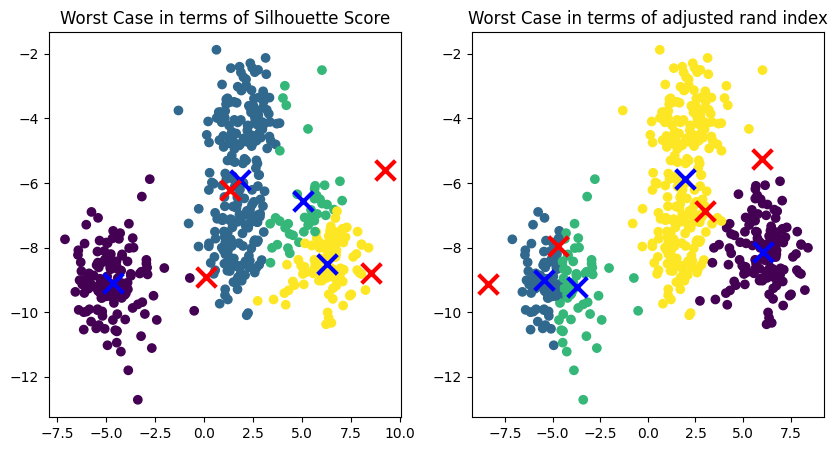

In [38]:

X, y = datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

n_iterations = 100
n_clusters = 4

silhouette_scores = []
adjusted_rand_scores = []
kmeans_list = []

for i in range(n_iterations):
    initial_centroids = np.random.normal(loc=X.mean(axis=0), scale=X.std(axis=0), size=(n_clusters, X.shape[1]))
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    adjusted_rand_scores.append(adjusted_rand_score(y, kmeans.labels_))

    kmeans_list.append(kmeans)

worst_silhouette_idx = np.argmin(silhouette_scores)
worst_silhouette_kmeans = kmeans_list[worst_silhouette_idx]

worst_adjusted_rand_idx = np.argmin(adjusted_rand_scores)
worst_adjusted_rand_kmeans = kmeans_list[worst_adjusted_rand_idx]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=worst_silhouette_kmeans.labels_)
plt.scatter(worst_silhouette_kmeans.cluster_centers_[:, 0], worst_silhouette_kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='blue')
plt.scatter(worst_silhouette_kmeans.init[:, 0], worst_silhouette_kmeans.init[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title("Worst Case in terms of Silhouette Score")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=worst_adjusted_rand_kmeans.labels_)
plt.scatter(worst_adjusted_rand_kmeans.cluster_centers_[:, 0], worst_adjusted_rand_kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='blue')
plt.scatter(worst_adjusted_rand_kmeans.init[:, 0], worst_adjusted_rand_kmeans.init[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title("Worst Case in terms of adjusted rand index")